# Data Preprocessing


In [1]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset

df = pd.read_csv("IPL Data.csv")
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see here that every alternative row conatins null values, thus we need to remove these rows from the dataset.

In [3]:
# Removing Null Values

df = df.dropna(axis=0)
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [4]:
# Checking the Shape of the Dataset after removing empty rows

rows, columns = df.shape
print('The dataframe has', rows, 'rows and', columns, 'columns')

The dataframe has 90 rows and 7 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [6]:
# Quick glimpse about the distribution of the data

df.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


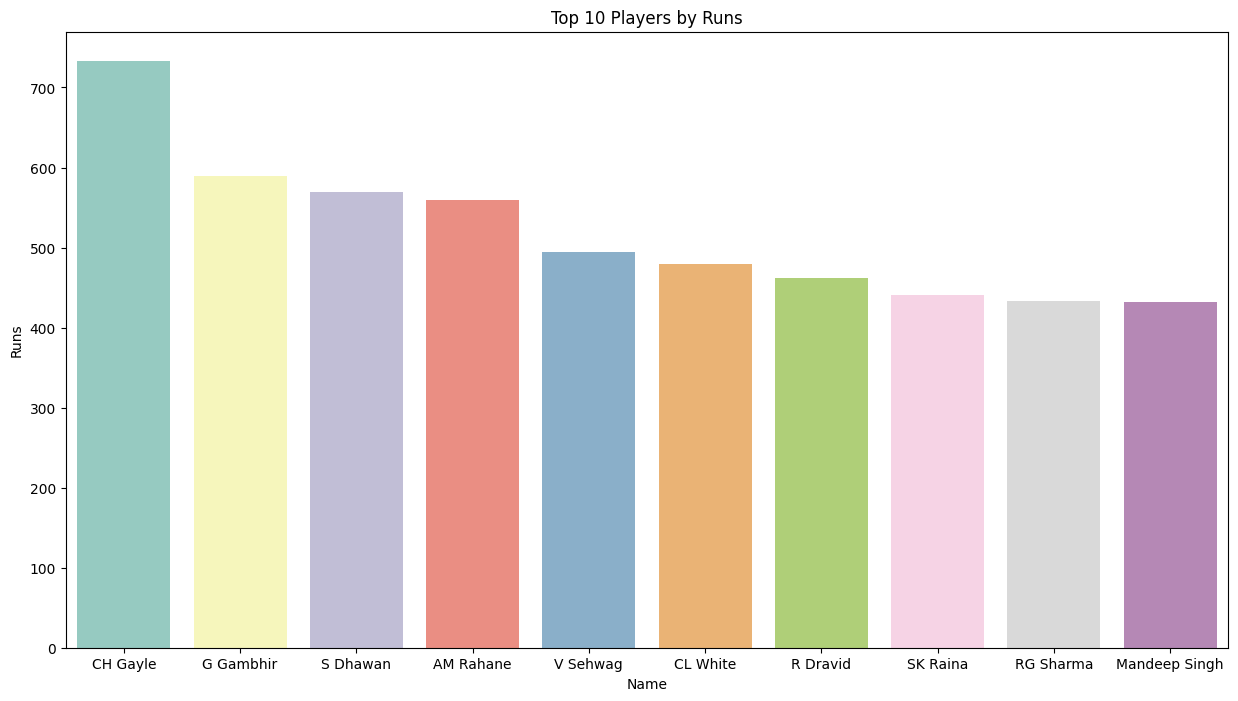

In [7]:
# Plotting a Bar Graph for Top 10 players with highest runs in the league

plt.figure(figsize=(15,8))
b1=df.groupby('Name')['Runs'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index()
b1.columns = ['Name' ,'Runs']
sns.barplot(data= b1 , x= 'Name' , y ='Runs', palette = 'Set3');
plt.title("Top 10 Players by Runs");


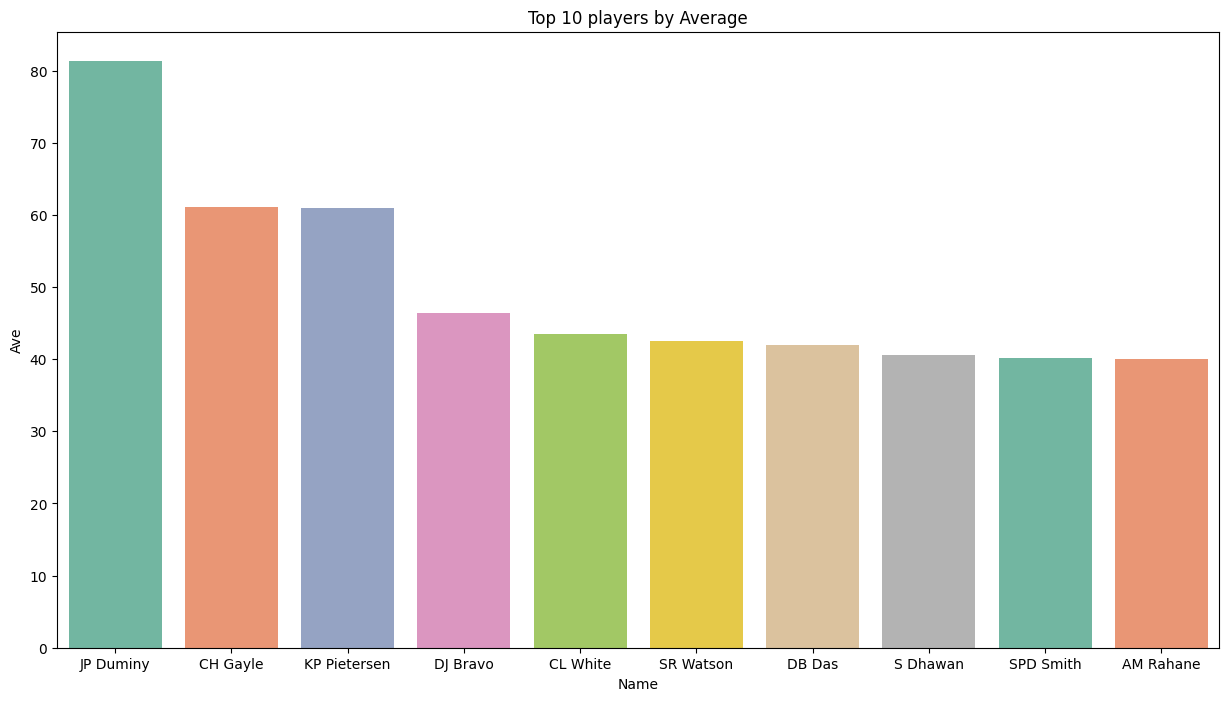

In [8]:
# Plotting a bar graph for top 10 players by highest average in the league

plt.figure(figsize=(15,8))
b1=df.groupby('Name')['Ave'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index()
b1.columns = ['Name' ,'Ave']
sns.barplot(data= b1 , x= 'Name' , y ='Ave', palette = 'Set2')
plt.title("Top 10 players by Average");

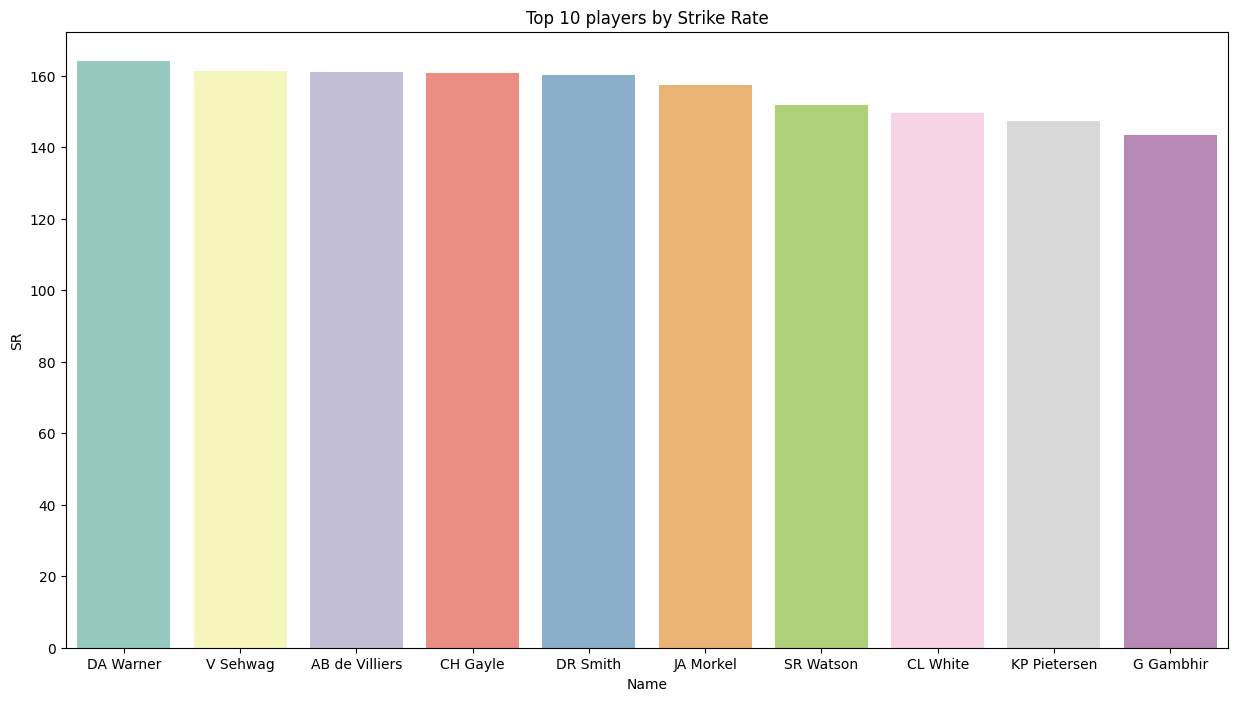

In [9]:
# Plotting a bar graph for top 10 players with highest strike rate

plt.figure(figsize=(15,8))
b1=df.groupby('Name')['SR'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index()
b1.columns = ['Name' ,'SR']
sns.barplot(data= b1 , x= 'Name' , y ='SR', palette = 'Set3')
plt.title("Top 10 players by Strike Rate");

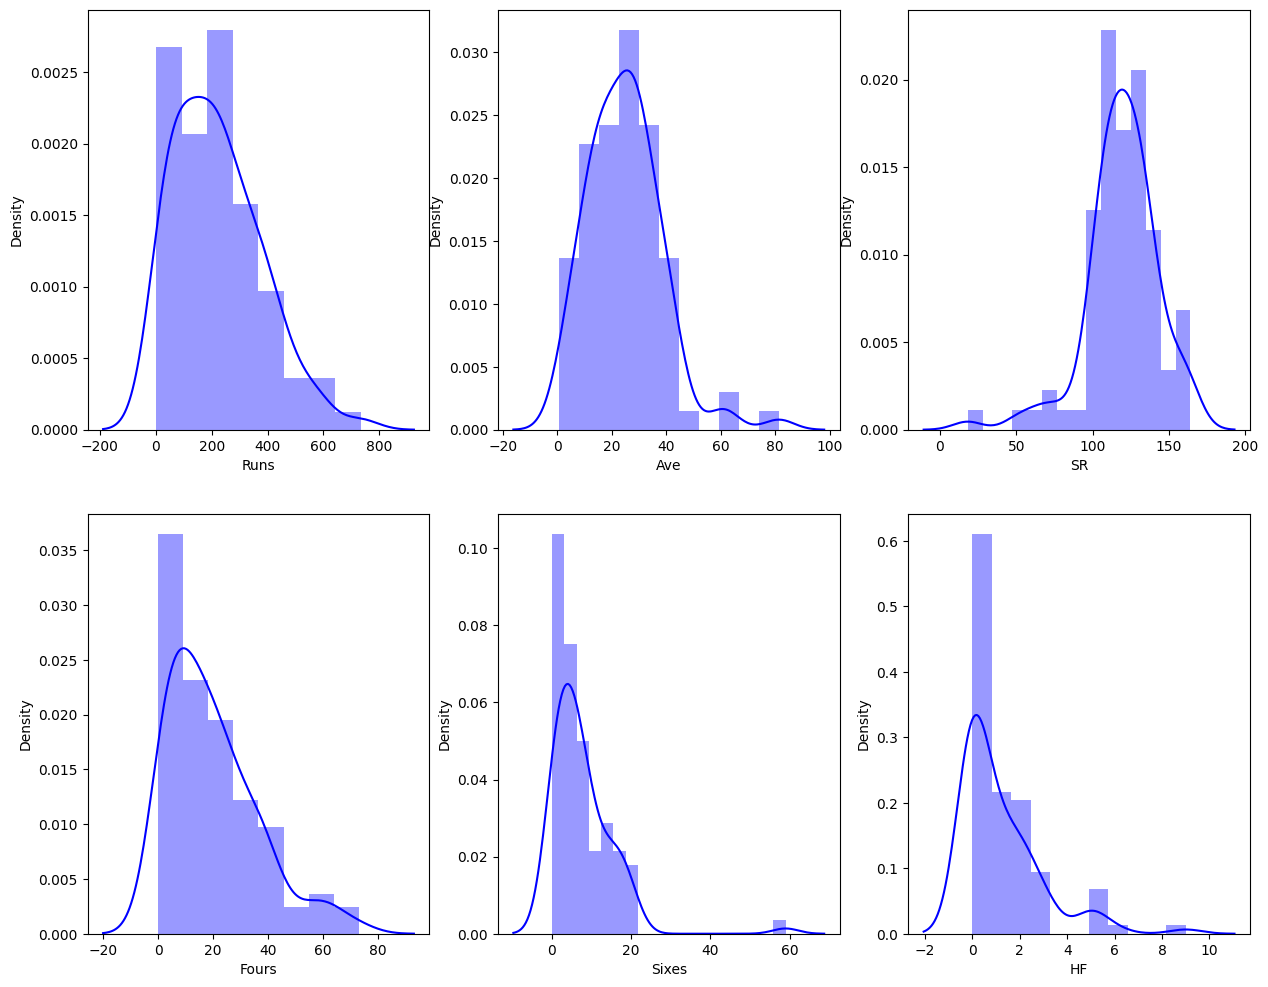

In [10]:
# Plotting the distribution of the columns in the dataset

plt.figure(figsize=(15, 12))
col = 1
for i in df.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.distplot(df[i], color = 'b')
    col += 1

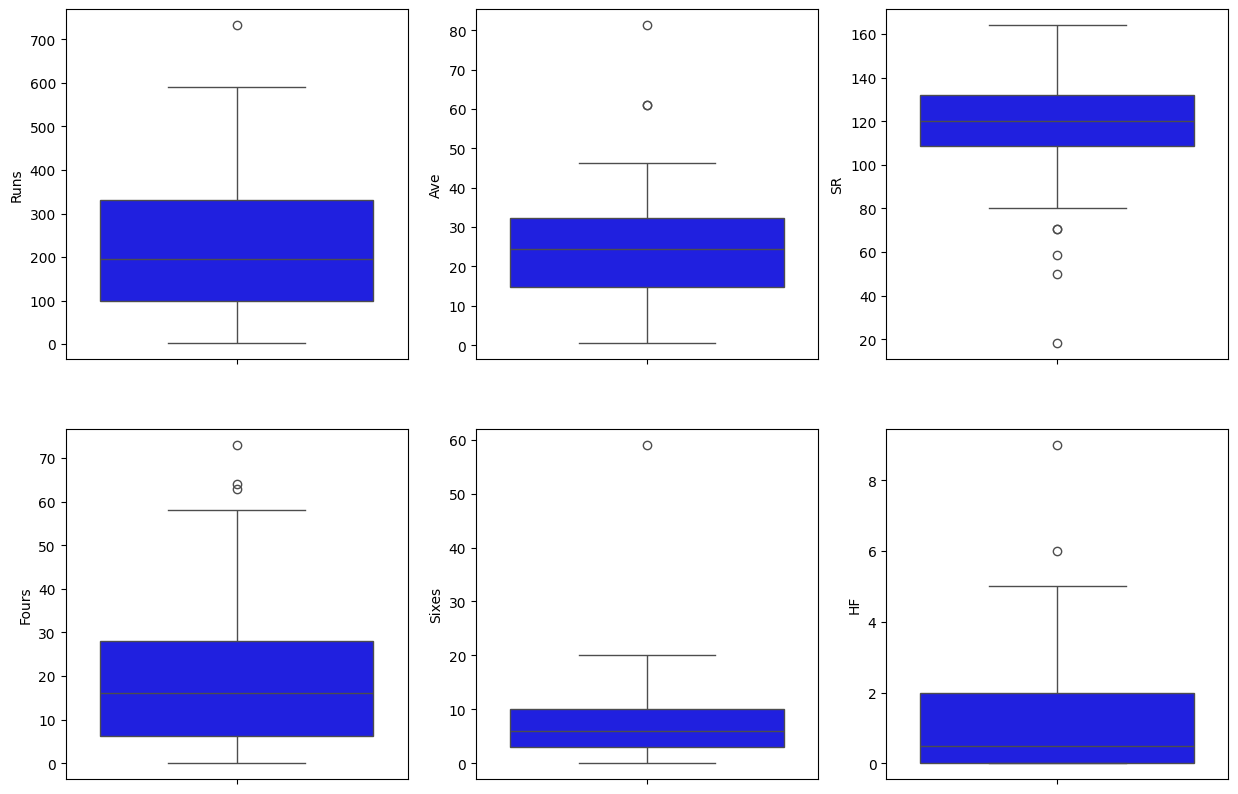

In [11]:
# Plotting boxplot to check the outlier values in the dataset

plt.figure(figsize=(15, 10))
col = 1
for i in df.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.boxplot(df[i],color='blue')
    col += 1

Here, we can see some outliers, but luckily, in this case, we know the context of the data. Chris Gayle and some other batsmen have performed really well, and thus, it seems like anomalies here, but they are not. Peak Chris Gayle was something else, guys...

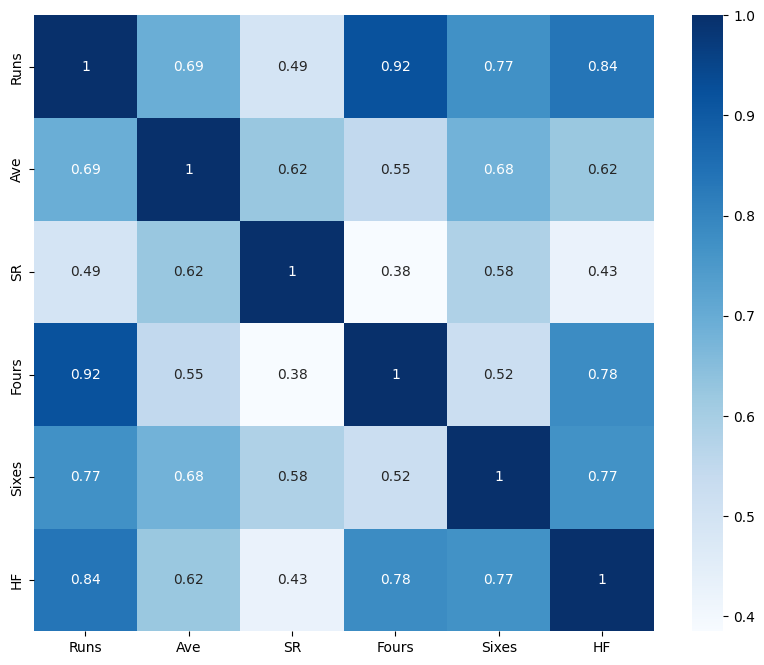

In [12]:
# Plotting a correlation matrix using Heatmap

plt.figure(figsize=(10,8))
corr=df.drop(columns='Name').corr()
sns.heatmap(corr,annot=True, cmap='Blues');

In [13]:
df_scaled = df.iloc[:, 1:7]

# Standardizing the data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

# Creating a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[1:7])

print(df_scaled.head())

       Runs       Ave        SR     Fours     Sixes        HF
0  3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
1  2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
2  1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
3  1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
4  2.246490  1.174755  0.444038  2.343021  1.309851  2.269533


# Clustering using K-means clustering



In [14]:
#checking for the within sum of squares
wss =[]
for i in range(1,6):
    KM = KMeans(n_clusters=i)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)
wss

[540.0,
 296.26135354732025,
 223.36518460916955,
 178.17507967590413,
 154.8280452379497]

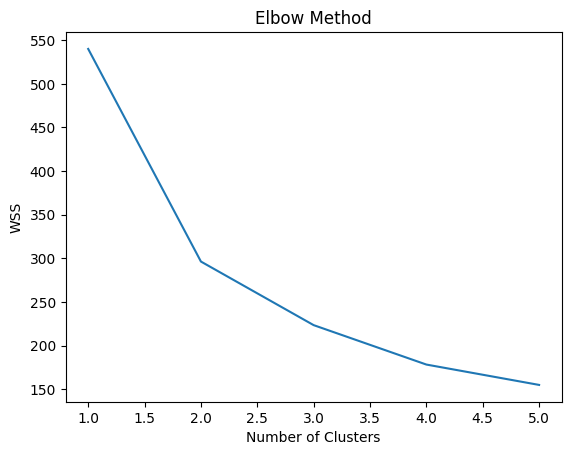

In [15]:
#plotting to check for optimal clustres
plt.plot(range(1,6), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [16]:
#using 2 centroids
k_means = KMeans(n_clusters = 2)
k_means.fit(df_scaled)
labels = k_means.labels_

In [17]:
# Calculating silhouette_score
silhouette_score(df_scaled,labels)

0.41111085574076756

In [18]:
#plotting silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

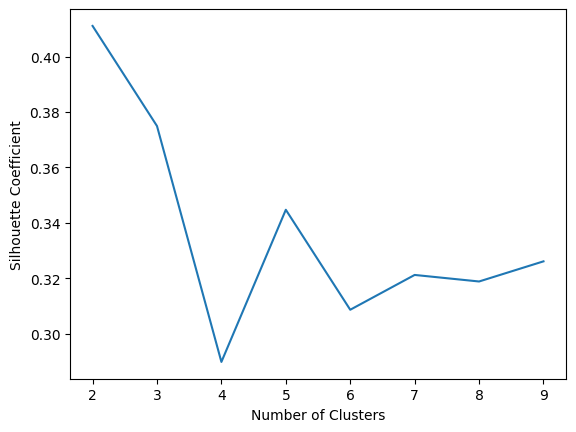

In [19]:
plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [20]:
#attaching the labels to the original data

df['cluster']=labels
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,1
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,1
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,1
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,1
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,1


In [21]:
#veiwing the distribution of the clusters

df.cluster.value_counts().sort_index()

0    55
1    35
Name: cluster, dtype: int64

In [22]:
aggdata=df.iloc[:,0:9].groupby('cluster').mean()
aggdata['Freq']=df.cluster.value_counts().sort_index()
aggdata

,Runs,Ave,SR,Fours,Sixes,HF,Freq
cluster,,,,,,,
0,122.745455,17.582000,110.481455,10.309091,3.636364,0.218182,55
1,372.657143,35.962286,132.808286,34.685714,13.771429,2.714286,35


In [23]:
df['cluster'] = df['cluster'].replace({1: 'Grade B', 0: 'Grade A'})

In [24]:
#list of Grade A players
Grade_A = df[df['cluster'] == 'Grade A']
Grade_A.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
69,MS Bisla,213.0,30.42,133.12,16.0,10.0,1.0,Grade A
73,BJ Hodge,245.0,30.62,140.00,18.0,9.0,0.0,Grade A
75,NV Ojha,255.0,23.18,113.83,21.0,13.0,1.0,Grade A
77,DB Das,126.0,42.00,135.48,9.0,6.0,0.0,Grade A
79,AC Gilchrist,172.0,34.40,120.27,21.0,4.0,1.0,Grade A
81,BB McCullum,289.0,24.08,102.12,37.0,3.0,1.0,Grade A
83,IK Pathan,176.0,25.14,139.68,14.0,6.0,0.0,Grade A
85,Azhar Mahmood,186.0,23.25,130.98,16.0,8.0,0.0,Grade A
87,MK Pandey,143.0,20.42,127.67,12.0,6.0,1.0,Grade A
89,S Badrinath,196.0,28.00,108.28,23.0,2.0,1.0,Grade A


In [25]:
Grade_B = df[df['cluster'] == 'Grade B']
Grade_B.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade B
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade B
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Grade B
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Grade B
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade B
